<a href="https://colab.research.google.com/github/Intertangler/biostats2021/blob/main/Exercise_05_error.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# computational demo of the central limit theorem
Let's say we are measuring the volume of liquid using a pipette. There are several independent variables that lead to error. For example: the temperature, the amount of dust in the pipette, the taper of the pipette tip, the loss of droplets on the walls of the pipette, etc etc.

Below, we demonstrate the CLT by summing independent random values from -1 to 1. Observe the emergence of the Gaussian distribution by increasing the number of variables that get summed. 

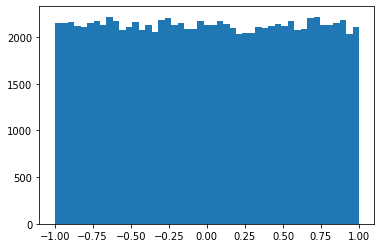

In [ ]:
import random
import matplotlib.pyplot as plt 

number_of_measuremts = 100000
number_of_error_variables = 1 # modify this line to add more independent variables

data = []
for measurement in range(number_of_measuremts):
  sum_variables = 0
  for i in range(number_of_error_variables):
    variable_value = random.uniform(-1,1)
    sum_variables += variable_value
  data += [sum_variables]

plt.hist(data, bins="auto")
plt.show()

# Problem 5.0 computing the Gaussian integral (integral = area = probability)

In the lectures we talked about the idea of the area under the curve and its significance to probability distributions as representing the value X weighted by probability. In the case of the Gaussian distribution, if our X value is the Z statistic i.e. our distribution is in fact the "unit Gaussian", then we can define an X-range in terms of standard deviations away from the mean. The area under the curve then takes on a special meaning in this case - it is the probability or confidence associated with that particular interval - e.g. 2 standard deviations corresponding to 0.9545 probability.

To make this point clearer, let's generate our own Gaussian lookup-table (actually just a 1D list for us) like the ones presented in the slides. We will do this by solving the Gaussian integral numerically. To perform an integral numerically, we can use "Euler's method" - essentially computing the area of a tiny X range "dx" = x1-x2 multiplied by its corresponding height of the curve f(dx) ~ f(x1) ~ f(x2). This approximation, while not perfect, will give us a good estimate.

Below we have a rough skeleton of the code you will use - fill in the missing portions:
1. a function to compute the probability density of the Gaussian
2. a loop that produces a list of Gaussian integrals for different confidence intervals (i.e. factors of sigma away from the mean)

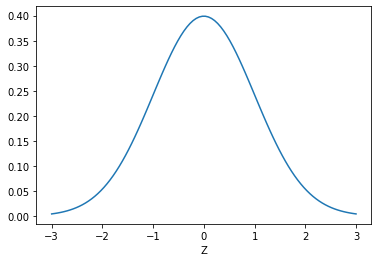

In [5]:
import math
import numpy as np
import matplotlib.pyplot as plt
def gaussian(x, mu, sigma):
  #your code here
  return f

# test out your gaussian function:
fcurve = []
for x in np.linspace(-3,3, 100):
  f = gaussian(x, mu = 0, sigma = 1)
  fcurve += [f]
plt.plot(np.linspace(-3,3, 100), fcurve)
plt.xlabel("Z")


def compute_integral(N_bins, interval):
  mu = 0
  sigma = 1
  a = -1*interval
  b = interval
  dx = (a - b)/N_bins
  area = 0
  for x in np.linspace(a, b, N_bins):
    area += np.abs(dx*gaussian(x, mu, sigma))
  return(area)

# your code here



# Problem 5.1 standard error of the mean
Write your own function to compute the standard error of the mean from a dataset input. 

The code below will auto-generate a random dataset of mass values. Anayze the datasets produced - what tends to happen as you increase the number of datapoints?

1.0391024009107053


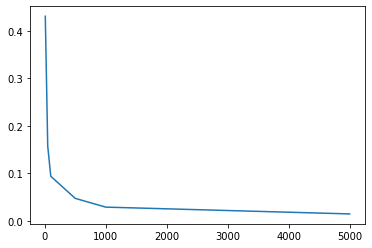

In [ ]:
import numpy as np
import math

def sem(my_data):
  #your code here
  return my_sem

repeats = 50
true_mean = 12
sample_size_N = 5
mass_data = []
for measurement in range(sample_size_N):
  mass_meas = np.random.normal(loc=true_mean, scale=1.2, size=None)
  mass_data += [mass_meas]

print(sem(mass_data))

# optional analysis and plot of SEM with different sample sizes N

# measurement error
In experimental sciences, it is very common to estimate the concentrations of dissolved chemicals using absorbance spectroscopy or spectrophotometry. I.e. the darker the solution, the more solute is present in it. This technique can be used to measure how much DNA is dissolved in water, since DNA absorbs UV light at a wavelength of 260 nm.

In a typical absorbance spectroscopy experiment, concentration is calculated using the Beer-Lambert equation:

$c = \frac{A}{\epsilon l}$ where A is the absorbance (the fraction of light that is able to pass through the sample relative to the source light), $\epsilon$ is a molar extinction coefficient equal to (0.027 (μg/ml)^−1^cm−1 in the case of single stranded DNA, and $l$ is the pathlength or distance that the light has to travel through the sample. 

The code below will generate a dataset of absorbance measurements and pathlength measurements.

In [ ]:
### run this block of code ###
import os.path
import sys
from os import path
import numpy as np

if path.exists("/content/biostats2021/"):
    pass
else:
    !git clone https://github.com/Intertangler/biostats2021.git
sys.path.insert(0,'/content')
data = np.loadtxt('/content/biostats2021/absorbance.txt')

experiments = 100 
extinction_coeff = 0.027 # (μg/ml)^−1^cm−1

### data generator - do not modify ###
abs_data = [] # absorbance
pathl_data = [] # cm
for experiment in range(experiments):
  abs_data += [max(0,np.random.normal(loc=data[0], scale=0.01198273, size=None))]
  pathl_data += [max(0,np.random.normal(loc=data[1], scale=0.1354, size=None))]

# Problem 5.2 measurement
Examine the abs_data object that has been generated above - this is our absorbance data. 

Compute the sample mean and standard deviation. Do the same for the pathlength data pathl_data.

Compute the mean concentration using the Beer Lambert formula and the mean values of absorbance and pathlength, as well as the extinction coefficient for DNA. 

In [ ]:
# your code here

print(mean_conc, "μg")

Now we want to know the uncertainty of the force that we got from our calculation. To do this, we employ the law of combination of errors, also known as the error propagation method.

Error propagation formula:

$\sigma_C = ((\frac{dC}{dl})^2\sigma_l^2 + (\frac{dC}{dA})^2\sigma_A^2)$ 

$C = \frac{A}{\epsilon l}$

$\frac{dC}{dl} = \frac{d}{dl}C = \frac{d}{dl}(\frac{A}{\epsilon l}) = -\frac{A}{\epsilon l^2}$

$\frac{dC}{dA} = \frac{d}{dA}C = \frac{d}{dA}(\frac{A}{\epsilon l}) = \frac{1}{\epsilon l}$

$\sigma_C = ((?)^2\sigma_l^2 + (?)^2\sigma_A^2)^{1/2}$ 

Compute the standard deviation now for the concentration with the formula above. 

In [ ]:
std_conc = "your code here"


print("concentration = ", mean_conc, " ± ", std_conc, " μg")